In [1]:
##  Titanic dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv(r"C:\Users\Win10\Desktop\NeU 1st Sem\DS\5th Lecture\titanic\train.csv")
test_data = pd.read_csv(r"C:\Users\Win10\Desktop\NeU 1st Sem\DS\5th Lecture\titanic\test.csv")
print("Training data: {}".format(train_data.shape))
print("Test data: {}".format(test_data.shape))
print(train_data.columns)
train_data.info()

Training data: (891, 12)
Test data: (418, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.tail(5)
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train_data.Sex.value_counts())

print("\nEmbarked value count")
train_data.Embarked.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Embarked value count


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
##  detailed look of missing training data

total = train_data.isnull().sum().sort_values(ascending = False)
percent1 = round((train_data.isnull().sum() / train_data.isnull().count() *100),2).sort_values(ascending = False)
missing_data = pd.concat([total,percent1],axis=1,keys = ["Total", "Percentage"])
missing_data.head(5)

,Total,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


Text(0.5, 1.0, 'Men')

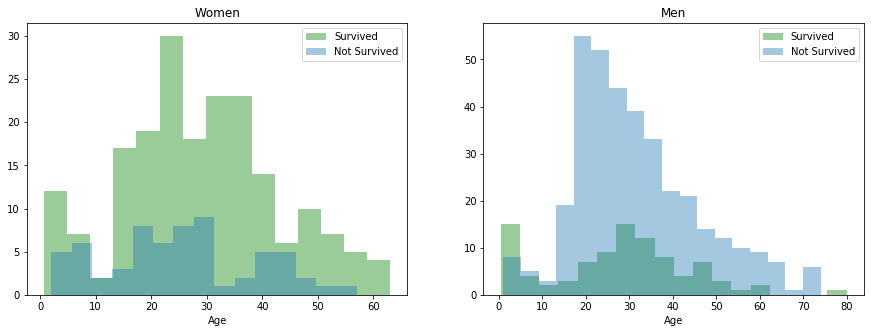

In [8]:
##  Age and sex

women = train_data[train_data["Sex"]=="female"]
men = train_data[train_data.Sex == "male"]
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.distplot(women[women.Survived == 1].Age.dropna(), bins=15, ax = axes[0],  label="Survived", kde=False,color = "green")
ax = sns.distplot(women[women.Survived == 0].Age.dropna(), bins=15, ax = axes[0],  label="Not Survived", kde=False)
ax.legend()
ax.set_title("Women")

ax = sns.distplot(men[men.Survived == 1].Age.dropna(), bins = 18, ax=axes[1], label="Survived", kde=False, color="green")
ax = sns.distplot(men[men.Survived == 0].Age.dropna(), bins = 18, ax=axes[1], label="Not Survived", kde=False)
ax.legend()
ax.set_title("Men")

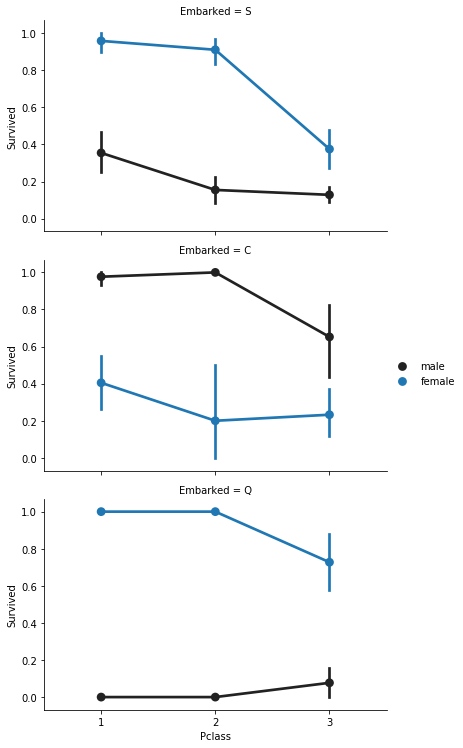

In [9]:
##  Embarked, Pclass, Sex

FacetGrid = sns.FacetGrid(train_data, row = "Embarked", height=3.5, aspect=1.6)
FacetGrid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

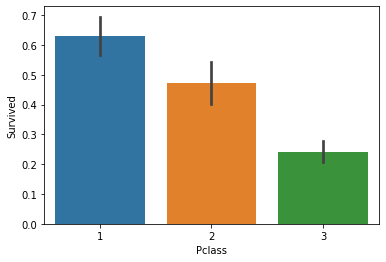

In [10]:
##  Class

sns.barplot("Pclass","Survived", data=train_data)

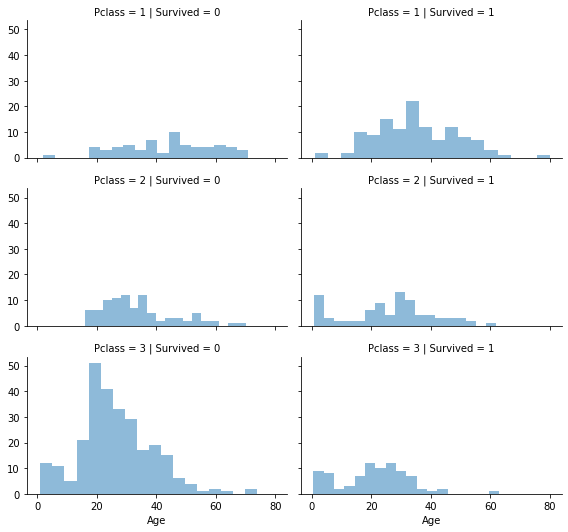

In [11]:
grid = sns.FacetGrid(train_data, row="Pclass", col="Survived", height=2.5, aspect=1.6)
grid.map(plt.hist, "Age", bins=18, alpha=0.5)
#grid.add_legend()

In [12]:
##  merging SibSp and ParCh into one column - not alone -> 0 or 1

data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    #print(dataset)
print("Training data:")
print(train_data['not_alone'].value_counts())
print("Test data: ")
print(test_data.not_alone.value_counts())

Training data:
1    537
0    354
Name: not_alone, dtype: int64
Test data: 
1    253
0    165
Name: not_alone, dtype: int64


C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


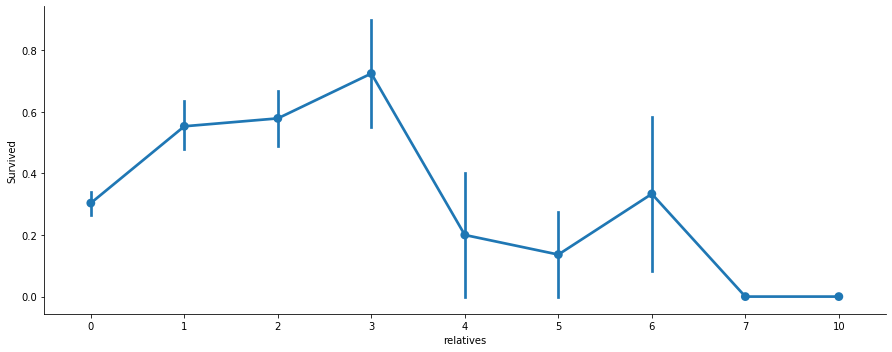

In [13]:
axes = sns.factorplot('relatives','Survived', data=train_data, aspect = 2.5, )


In [14]:
## Data preprocessing
## drop passenger id

train_data = train_data.drop("PassengerId", axis=1)


In [15]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [16]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [17]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [18]:
##  replacing missing age values both in training and test data

data = [train_data, test_data]
for dataset in data:
    mean = dataset.Age.mean()
    std = dataset.Age.std()
    is_null = dataset.Age.isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
print(train_data["Age"].isnull().sum())
print(test_data.Age.isnull().sum())

0
0


In [19]:
## Missing 2 embarked value. fill with median
train_data.Embarked.describe()

data = [train_data, test_data]
for dataset in data:
    dataset.Embarked = dataset.Embarked.fillna("S")

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


In [21]:
##  converting Fare datatype from float to int

data = [train_data, test_data]
for dataset in data:
    dataset.Fare = dataset.Fare.fillna(0)
    dataset.Fare = dataset.Fare.astype("int")


In [22]:
##  extracting titles from Name

data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    # extract titles
    dataset["Title"] = dataset.Name.str.extract( "([A-Za-z]+)\.")
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major', 'Rev','Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_data.Title.value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [23]:
##  convert sex feature to numeric

gender = {"male":0, "female":1}
data = [train_data, test_data]
for dataset in data:
    dataset["Sex"] = dataset.Sex.map(gender)
train_data.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [24]:
train_data.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [25]:
##  drop ticket from dataset

#train_data = train_data.drop("Ticket",axis=1)
#test_data = test_data.drop(["Ticket"], axis=1)

In [26]:
##  convert Embarked into numeric

ports = {"S":0, "C":1, "Q":2}
data = [train_data, test_data]
for dataset in data:
    dataset["Embarked"] = dataset.Embarked.map(ports)
train_data["Embarked"].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [27]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.570146,0.523008,0.381594,31.785634,0.361392,0.904602,0.602694,6.936027,1.728395
std,0.486592,0.836071,0.477990,13.516048,1.102743,0.806057,49.703730,0.635673,1.613459,0.489615,2.074282,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,8.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,8.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,8.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,2.000000,10.000000,1.000000,8.000000,5.000000


In [28]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,0,1,0,8,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,1,1,0,3,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,0,0,1,8,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,0,1,0,3,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,0,0,1,8,1


In [29]:
##  creating categories for Age

data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_data['Age'].value_counts()

4    174
6    170
5    135
3    134
2    120
1     90
0     68
Name: Age, dtype: int64

In [30]:
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
train_data.Fare.value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [31]:
##  create new feature age*Pclass

data = [train_data, test_data]
for dataset in data:
    dataset["Age_Class"] = dataset["Age"]*dataset["Pclass"]
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,0,1,0,8,1,6
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,3,1,1,0,3,3,5
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,0,0,0,1,8,2,9
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,0,1,0,3,3,5
4,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,0,0,1,8,1,15


In [32]:
##  create fare per person

for dataset in data:
    dataset["Fare_per_person"] = dataset["Fare"]/(dataset["not_alone"]+1)
    dataset["Fare_per_person"] = dataset["Fare_per_person"].astype(int)

In [33]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_person
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,0,1,0,8,1,6,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,3,1,1,0,3,3,5,3
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,0,0,0,1,8,2,9,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,0,1,0,3,3,5,3
4,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,0,0,1,8,1,15,0


In [35]:
##  Prepare training and test dataset

X_train = train_data.drop(["Survived","Name","Ticket"], axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop(["Name","Ticket","PassengerId"], axis=1)
print(X_test.head(5))

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  relatives  not_alone  Deck  \
0       3    0    2      0      0     0         2          0          1     8   
1       3    1    5      1      0     0         0          1          0     8   
2       2    0    3      0      0     1         2          0          1     8   
3       3    0    5      0      0     1         0          0          1     8   
4       3    1    5      1      1     1         0          2          0     8   

   Title  Age_Class  Fare_per_person  
0      1          6                0  
1      3         15                0  
2      1          6                0  
3      1         15                0  
4      3         15                1  


In [37]:
##  Stochastic Gradient Descent (SGD) Linear Model
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.99

In [38]:
##  Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.82

In [39]:
##  Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.26

In [42]:
##  K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.32

In [43]:
##  Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.1

In [49]:
##  Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


80.58

In [50]:
##  Linear Support Vector machine
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.48

In [54]:
##  Decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
print(decision_tree.score(X_test,Y_pred))
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

1.0


92.82

In [53]:
##  finding out the best model

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
87.32,KNN
81.48,Support Vector Machines
81.26,Logistic Regression
80.58,Perceptron
77.10,Naive Bayes
76.99,Stochastic Gradient Decent
